PROJECT 1

I have worked on both the march dataset and the january dataset simultaneously throughout the project because i was aiming for the extra credit part of the assignment, so please bare with the redundant parts of the code. 

Data Dictionary - https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

import seaborn
import numpy as np
# pd.show_versions()

mar_df = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
jan_df = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')

Checking the data types of features

In [2]:
mar_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

Checking for missing values.

In [3]:
mar_df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
dtype: bool

Some stats for the dataset.

In [4]:
mar_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

VendorID passenger_count  trip_distance     RatecodeID  \
count  3007687.00000   2969879.00000  3007687.00000  2969879.00000   
mean         1.67199         1.46748        3.11704        1.05138   
std          0.47289         1.12009      206.92073        0.71092   
min          1.00000         0.00000        0.00000        1.00000   
25%          1.00000         1.00000        1.00000        1.00000   
50%          2.00000         1.00000        1.67000        1.00000   
75%          2.00000         1.00000        3.02000        1.00000   
max          6.00000         9.00000   269803.73000       99.00000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  3007687.00000  3007687.00000  3007687.00000  3007687.00000   
mean       163.42978      160.93363        1.25181       12.69764   
std         66.58654       70.74132        0.49412      387.12970   
min          1.00000        1.00000        0.00000    -1259.00000   
25%        114.00000      107.00000        1.00000        6.50000   
50%        162.00000      162.00000        1.00000        9.00000   
75%        234.00000      234.00000        2.00000       14.00000   
max        265.00000      265.00000        4.00000   671100.14000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  3007687.00000  3007687.00000  3007687.00000  3007687.00000   
mean         1.24680        0.65804        2.13858        0.30424   
std        288.30853      288.30602        2.71930        1.60749   
min         -7.00000       -0.50000     -493.22000      -40.00000   
25%          0.00000        0.50000        0.00000        0.00000   
50%          0.50000        0.50000        1.92000        0.00000   
75%          2.50000        0.50000        2.86000        0.00000   
max     500000.80000   500000.50000      800.00000      601.02000   

      improvement_surcharge   total_amount congestion_surcharge airport_fee  
count         3007687.00000  3007687.00000        2969879.00000     0.00000  
mean                0.29759       18.84196              2.26830         nan  
std                 0.03711      694.55153              0.74946         nan  
min                -0.30000    -1260.30000             -2.50000         nan  
25%                 0.30000       11.16000              2.50000         nan  
50%                 0.30000       14.30000              2.50000         nan  
75%                 0.30000       19.85000              2.50000         nan  
max                 0.30000  1000003.80000              2.50000         nan

Previous three steps for the Jan dataset

In [5]:
jan_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1               1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2               1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3               1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4               2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   
...           ...                  ...                   ...              ...   
6405003         2  2020-01-31 23:08:00   2020-01-31 23:34:00              NaN   
6405004         2  2020-01-31 23:00:00   2020-01-31 23:44:00              NaN   
6405005         2  2020-01-31 23:13:00   2020-01-31 23:38:00              NaN   
6405006         2  2020-01-31 23:02:54   2020-01-31 23:27:10              NaN   
6405007         2  2020-01-31 23:56:37   2020-02-01 00:16:35              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.20         1.0                  N           238   
1                 1.20         1.0                  N           239   
2                 0.60         1.0                  N           238   
3                 0.80         1.0                  N           238   
4                 0.00         1.0                  N           193   
...                ...         ...                ...           ...   
6405003          12.07         NaN               None           191   
6405004          23.48         NaN               None           186   
6405005          12.09         NaN               None           164   
6405006          11.65         NaN               None            10   
6405007           8.54         NaN               None           247   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 239             1         6.00   3.00      0.5        1.47   
1                 238             1         7.00   3.00      0.5        1.50   
2                 238             1         6.00   3.00      0.5        1.00   
3                 151             1         5.50   0.50      0.5        1.36   
4                 193             2         3.50   0.50      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
6405003            35             0        52.18   2.75      0.5        0.00   
6405004           117             0        54.01   2.75      0.5        0.00   
6405005           131             0        38.02   2.75      0.5        0.00   
6405006            16             0        28.74   2.75      0.0        0.00   
6405007            81             0        31.31   2.75      0.0        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    0.3         11.27   
1                0.00                    0.3         12.30   
2                0.00                    0.3         10.80   
3                0.00                    0.3          8.16   
4                0.00                    0.3          4.80   
...               ...                    ...           ...   
6405003          0.00                    0.3         55.73   
6405004          6.12                    0.3         63.68   
6405005          6.12                    0.3         47.69   
6405006          0.00                    0.3         31.79   
6405007          0.00                    0.3         34.36   

         congestion_surcharge  airport_fee  
0                         2.5          NaN  
1                         2.5          NaN  
2                         2.5          NaN  
3                         0.0          NaN  
4                         0.0          NaN  
...                       ...          ...  
6405003                   NaN          NaN  
6405004                   NaN          NaN  
6405005                   NaN          NaN  
6405006                   N

In [6]:
jan_df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
dtype: bool

In [7]:
jan_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

VendorID passenger_count  trip_distance     RatecodeID  \
count  6405008.00000   6339567.00000  6405008.00000  6339567.00000   
mean         1.67300         1.51533        2.92964        1.05991   
std          0.46913         1.15159       83.15911        0.81184   
min          1.00000         0.00000      -30.62000        1.00000   
25%          1.00000         1.00000        0.96000        1.00000   
50%          2.00000         1.00000        1.60000        1.00000   
75%          2.00000         2.00000        2.93000        1.00000   
max          5.00000         9.00000   210240.07000       99.00000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  6405008.00000  6405008.00000  6405008.00000  6405008.00000   
mean       164.73226      162.66269        1.25732       12.69411   
std         65.54374       69.91261        0.48857       12.12730   
min          1.00000        1.00000        0.00000    -1238.00000   
25%        132.00000      113.00000        1.00000        6.50000   
50%        162.00000      162.00000        1.00000        9.00000   
75%        234.00000      234.00000        2.00000       14.00000   
max        265.00000      265.00000        5.00000     4265.00000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  6405008.00000  6405008.00000  6405008.00000  6405008.00000   
mean         1.11546        0.49232        2.18934        0.34884   
std          1.26005        0.07374        2.76003        1.76698   
min        -27.00000       -0.50000      -91.00000      -35.74000   
25%          0.00000        0.50000        0.00000        0.00000   
50%          0.50000        0.50000        1.95000        0.00000   
75%          2.50000        0.50000        2.86000        0.00000   
max        113.01000       30.80000     1100.00000      910.50000   

      improvement_surcharge   total_amount congestion_surcharge airport_fee  
count         6405008.00000  6405008.00000        6339567.00000     0.00000  
mean                0.29799       18.66315              2.29905         nan  
std                 0.03386       14.75736              0.70171         nan  
min                -0.30000    -1242.30000             -2.50000         nan  
25%                 0.30000       11.16000              2.50000         nan  
50%                 0.30000       14.30000              2.50000         nan  
75%                 0.30000       19.80000              2.50000         nan  
max                 0.30000     4268.30000              2.75000         nan

Here, it is evident that there is a significant decline (approximately 50%) in the sample count, confirming the impact of the pandemic during the month of March.
Some features exhibit missing values, and certain features also contain negative values.

Null values will be addressed following consultation with the data dictionary. The assignment includes a section dedicated to converting categorical data into numeric form, despite the data dictionary already containing numeric mappings for categorical data. It's important to note that I have introduced a new categorical feature, along with additional features such as "trip_time" (representing the trip duration), "trip_hour" (indicating the hour when the trip commenced), "weekday_st" (a string representation of the day of the week), and "weekday" (numerical representation of "weekday_st").

In [8]:
import datetime

mar_df['passenger_count'] = mar_df['passenger_count'].fillna(1.0)
mar_df['RatecodeID'] = mar_df['RatecodeID'].fillna(1.0)
mar_df['airport_fee'] = mar_df['airport_fee'].fillna(0.0)
mar_df['congestion_surcharge'] = mar_df['congestion_surcharge'].fillna(0.0)
mar_df['trip_time'] = mar_df['tpep_dropoff_datetime'] - mar_df['tpep_pickup_datetime']
mar_df['trip_time'] = mar_df['trip_time'].dt.total_seconds()
mar_df['store_and_fwd_flag'] = mar_df['store_and_fwd_flag'].fillna('N')
mar_df['trip_hour'] = mar_df['tpep_pickup_datetime'].dt.hour
mar_df['weekday_st'] = pd.Series(mar_df.tpep_pickup_datetime).dt.day_name()
mar_df['weekday'] = pd.Series(mar_df.tpep_pickup_datetime).dt.dayofweek
mar_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2020-03-01 00:31:13   2020-03-01 01:01:42              1.0   
1               2  2020-03-01 00:08:22   2020-03-01 00:08:49              1.0   
2               1  2020-03-01 00:52:18   2020-03-01 00:59:16              1.0   
3               2  2020-03-01 00:47:53   2020-03-01 00:50:57              2.0   
4               1  2020-03-01 00:43:19   2020-03-01 00:58:27              0.0   
...           ...                  ...                   ...              ...   
3007682         2  2020-03-31 23:21:00   2020-03-31 23:33:00              1.0   
3007683         2  2020-03-31 23:57:00   2020-04-01 00:26:00              1.0   
3007684         2  2020-03-31 23:22:01   2020-03-31 23:43:52              1.0   
3007685         2  2020-03-31 23:18:53   2020-03-31 23:32:21              1.0   
3007686         2  2020-03-31 23:11:00   2020-03-31 23:30:00              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.70         1.0                  N            88   
1                 0.00         1.0                  N           193   
2                 1.10         1.0                  N           246   
3                 0.87         1.0                  N           151   
4                 4.40         1.0                  N            79   
...                ...         ...                ...           ...   
3007682           5.43         1.0                  N           137   
3007683          13.21         1.0                  N           137   
3007684          12.14         1.0                  N           137   
3007685           7.01         1.0                  N           137   
3007686           6.31         1.0                  N           185   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 255             1  ...        2.00           0.0   
1                 193             2  ...        0.00           0.0   
2                  90             1  ...        1.95           0.0   
3                 238             1  ...        1.76           0.0   
4                 261             1  ...        4.05           0.0   
...               ...           ...  ...         ...           ...   
3007682            87             0  ...        0.00           0.0   
3007683            71             0  ...        0.00           0.0   
3007684            32             0  ...        0.00           0.0   
3007685           159             0  ...        0.00           0.0   
3007686            69             0  ...        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          0.3         27.80                   2.5   
1                          0.3          3.80                   0.0   
2                          0.3         11.75                   2.5   
3                          0.3         10.56                   2.5   
4                          0.3         24.35                   2.5   
...                        ...           ...                   ...   
3007682                    0.3         33.77                   0.0   
3007683                    0.3         41.27                   0.0   
3007684                    0.3         39.90                   0.0   
3007685                    0.3         22.87                   0.0   
3007686                    0.3         24.20                   0.0   

         airport_fee  trip_time  trip_hour  weekday_st  weekday  
0                0.0     1829.0          0      Sunday        6  
1                0.0       27.0          0      Sunday        6  
2                0.0      418.0          0      Sunday        6  
3                0.0      184.0          0      Sunday        6  
4                0.0      908.0          0      Sunday        6  
...              ...        ...        ...         ...      ...  
3007682          0.0      720.0        

Same procedure for cleaning the jan data

In [9]:
jan_df['passenger_count'] = jan_df['passenger_count'].fillna(1.0)
jan_df['RatecodeID'] = jan_df['RatecodeID'].fillna(1.0)
jan_df['airport_fee'] = jan_df['airport_fee'].fillna(0.0)
jan_df['congestion_surcharge'] = jan_df['congestion_surcharge'].fillna(0.0)
jan_df['store_and_fwd_flag'] = jan_df['store_and_fwd_flag'].fillna('N')
jan_df['trip_time'] = jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime'] 
jan_df['trip_time'] = jan_df['trip_time'].dt.total_seconds()
jan_df['trip_hour'] = jan_df['tpep_pickup_datetime'].dt.hour
jan_df['weekday_st'] = pd.Series(jan_df.tpep_pickup_datetime).dt.day_name()
jan_df['weekday'] = pd.Series(jan_df.tpep_pickup_datetime).dt.dayofweek

jan_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1               1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2               1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3               1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4               2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   
...           ...                  ...                   ...              ...   
6405003         2  2020-01-31 23:08:00   2020-01-31 23:34:00              1.0   
6405004         2  2020-01-31 23:00:00   2020-01-31 23:44:00              1.0   
6405005         2  2020-01-31 23:13:00   2020-01-31 23:38:00              1.0   
6405006         2  2020-01-31 23:02:54   2020-01-31 23:27:10              1.0   
6405007         2  2020-01-31 23:56:37   2020-02-01 00:16:35              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.20         1.0                  N           238   
1                 1.20         1.0                  N           239   
2                 0.60         1.0                  N           238   
3                 0.80         1.0                  N           238   
4                 0.00         1.0                  N           193   
...                ...         ...                ...           ...   
6405003          12.07         1.0                  N           191   
6405004          23.48         1.0                  N           186   
6405005          12.09         1.0                  N           164   
6405006          11.65         1.0                  N            10   
6405007           8.54         1.0                  N           247   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 239             1  ...        1.47          0.00   
1                 238             1  ...        1.50          0.00   
2                 238             1  ...        1.00          0.00   
3                 151             1  ...        1.36          0.00   
4                 193             2  ...        0.00          0.00   
...               ...           ...  ...         ...           ...   
6405003            35             0  ...        0.00          0.00   
6405004           117             0  ...        0.00          6.12   
6405005           131             0  ...        0.00          6.12   
6405006            16             0  ...        0.00          0.00   
6405007            81             0  ...        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          0.3         11.27                   2.5   
1                          0.3         12.30                   2.5   
2                          0.3         10.80                   2.5   
3                          0.3          8.16                   0.0   
4                          0.3          4.80                   0.0   
...                        ...           ...                   ...   
6405003                    0.3         55.73                   0.0   
6405004                    0.3         63.68                   0.0   
6405005                    0.3         47.69                   0.0   
6405006                    0.3         31.79                   0.0   
6405007                    0.3         34.36                   0.0   

         airport_fee  trip_time  trip_hour  weekday_st  weekday  
0                0.0      288.0          0   Wednesday        2  
1                0.0      445.0          0   Wednesday        2  
2                0.0      371.0          0   Wednesday        2  
3                0.0      291.0          0   Wednesday        2  
4                0.0      138.0          0   Wednesday        2  
...              ...        ...        ...         ...      ...  
6405003          0.0     1560.0        

I have excluded certain features from the dataset that I deemed unnecessary, and I do not anticipate using these features in the future.

In [10]:
mar_df = mar_df.drop(["VendorID", "RatecodeID", "store_and_fwd_flag", "mta_tax", "improvement_surcharge", "airport_fee"], axis = 1)
jan_df = jan_df.drop(["VendorID", "RatecodeID", "store_and_fwd_flag", "mta_tax", "improvement_surcharge", "airport_fee"], axis = 1)

In the following phase of data preparation, I've filtered out values that are either zero or negative. Additionally, I've segmented the data using the following criteria:

1.Trip durations are capped at a maximum of one day, equivalent to 86,400 seconds.

2.The total trip cost must not exceed 10,000

I created box plots for several features to examine the data's distribution.

<Axes: >

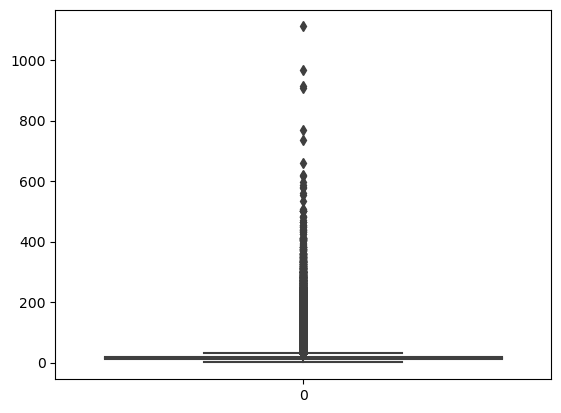

In [12]:
import seaborn as sns
mar_df = mar_df[mar_df['trip_distance']>0]
mar_df = mar_df[mar_df['trip_time']>0]
mar_df = mar_df[mar_df['trip_time']<86400]
mar_df = mar_df[mar_df['tip_amount']>=0]
mar_df = mar_df[mar_df['total_amount']<10000]
mar_df = mar_df[mar_df['total_amount']>0]
mar_df = mar_df[mar_df['passenger_count']>0]

jan_df = jan_df[jan_df['trip_distance']>0]
jan_df = jan_df[jan_df['trip_time']>0]
jan_df = jan_df[jan_df['trip_time']<86400]
jan_df = jan_df[jan_df['tip_amount']>=0]
jan_df = jan_df[jan_df['total_amount']<10000]
jan_df = jan_df[jan_df['total_amount']>0]
jan_df = jan_df[jan_df['passenger_count']>0]



sns.boxplot(jan_df['total_amount'])

<Axes: >

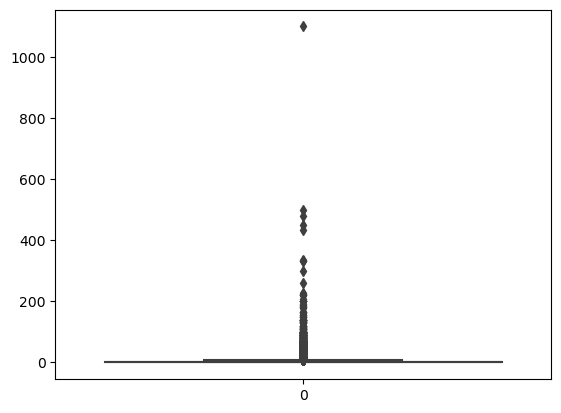

In [13]:
sns.boxplot(jan_df['tip_amount'])

I prefer using heatmaps to visualize feature correlations, and from the heatmap, it's evident that there are no strong correlations among most of the features. The only noteworthy observation is a positive correlation between amount-related features like "fare_amount," "total_amount," and "toll_amount," although this is not a groundbreaking finding.

<Axes: >

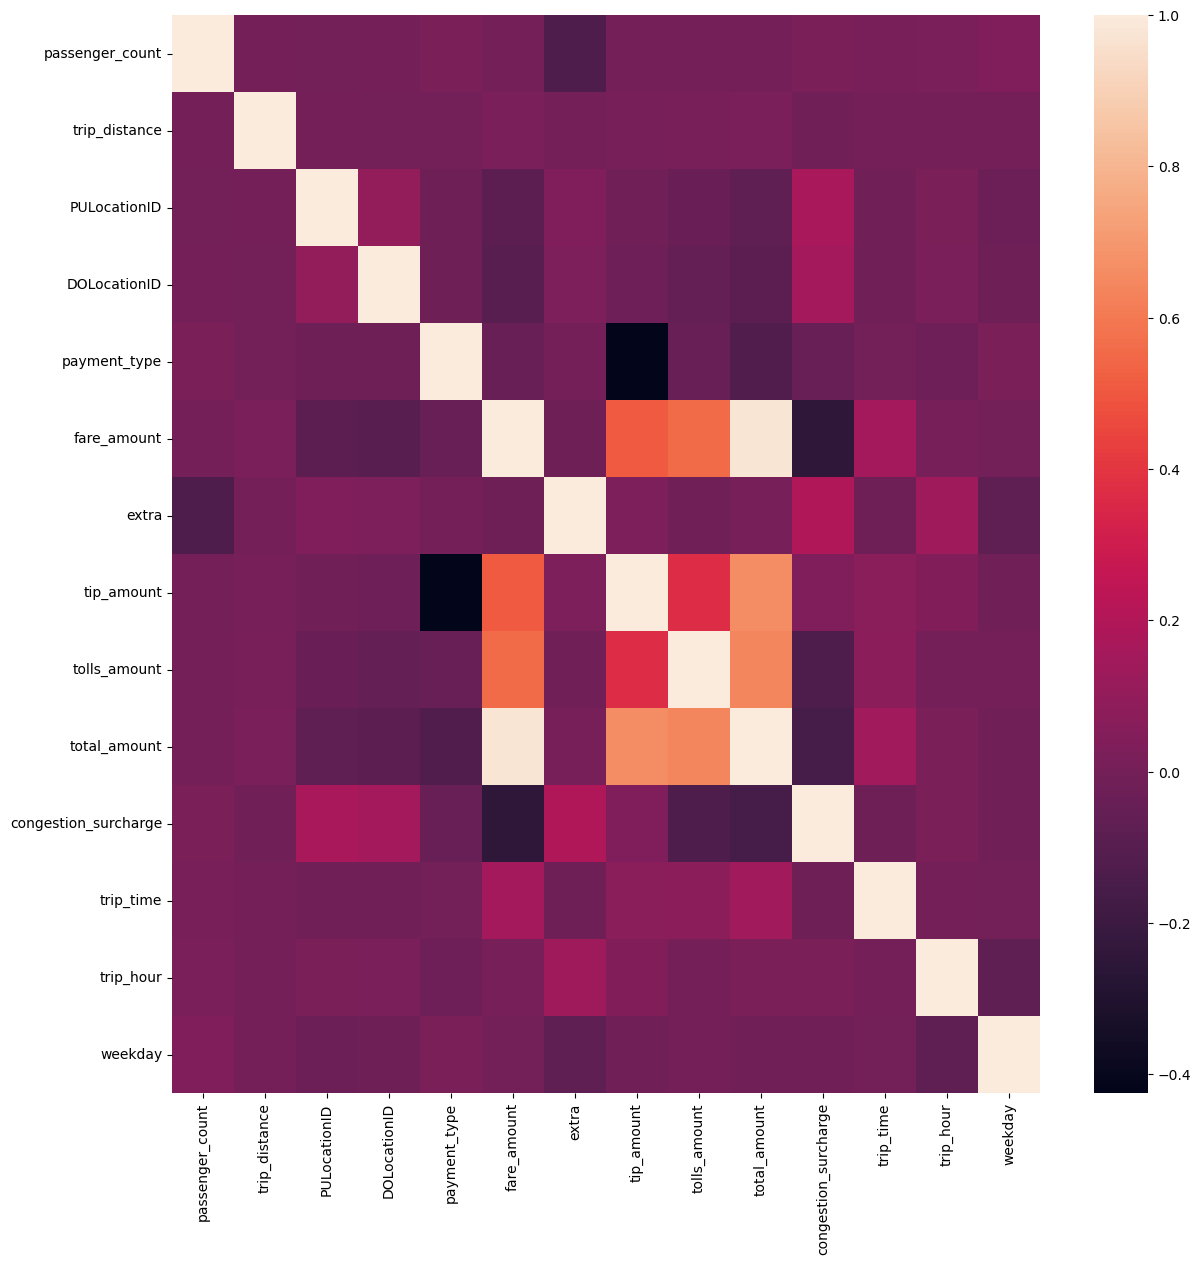

In [14]:
fig, ax = plt.subplots(figsize=(14, 14))
plot_df = mar_df.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","weekday_st"], axis = 1)
seaborn.heatmap(plot_df.corr(),
                xticklabels=plot_df.columns,
                yticklabels=plot_df.columns)

In response to the assignment's directive, which didn't require building a predictive model but rather identifying data issues and uncovering correlations to enhance ride time predictions, I decided to investigate peak trip times through two distinct approaches. First, I examined trips per hour of the day, and secondly, I analyzed trips per day of the week. This approach was taken because the heatmap indicated a lack of significant correlations among the features, prompting a focus on time-related patterns for potential insights into ride time predictions.

Text(0, 0.5, 'Hour')

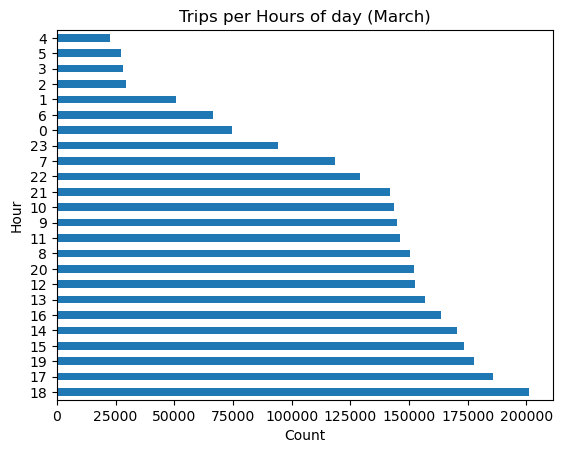

In [15]:
ax = mar_df['trip_hour'].value_counts() \
    .plot(kind='barh', title='Trips per Hours of day (March)')
ax.set_xlabel('Count')
ax.set_ylabel('Hour')

It's evident that during the month of March, there were significantly fewer trips occurring between the hours of 23:00 and 4:00. On the other hand, the most frequent trips took place between 12:00 and 18:00, with a peak observed in the evening hours. This temporal pattern highlights variations in trip frequencies throughout the day, which can be valuable for understanding ride time predictions.This observation clearly demonstrates the impact of office hours on the frequency of taxi trips, with a notable increase in trips during the daytime hours when many people are commuting to and from work.

Text(0, 0.5, 'Hour')

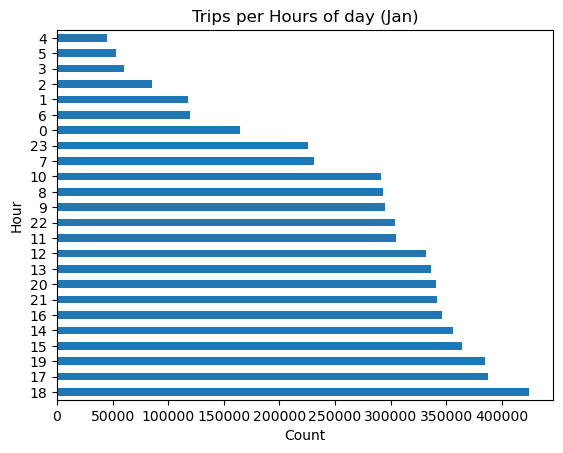

In [16]:
ax = jan_df['trip_hour'].value_counts() \
    .plot(kind='barh', title='Trips per Hours of day (Jan)')
ax.set_xlabel('Count')
ax.set_ylabel('Hour')

In terms of trends, there isn't a significant difference between the two months, except for a subtle pattern where there is a gradual decrease in trip frequency from high to low. This slight decline may indicate the impact of pandemic-related restrictions. However, a closer examination of the data reveals that in March, only 6 hours (representing 25% of the day) had trip counts exceeding 150,000. In contrast, during January, 18 hours (equivalent to 75% of the day) had trip counts surpassing 150,000. This stark contrast underscores the significant reduction in taxi trip volumes during the two months.

This plot, which examines the number of taxi trips per day of the week, reveals a noticeable pattern. Taxi trips experience a slight peak on workdays, with the highest frequency of trips occurring during these days. Conversely, the number of trips reaches its minimum on Saturdays. This pattern likely reflects the influence of workweek routines on taxi usage.

Text(0, 0.5, 'Count')

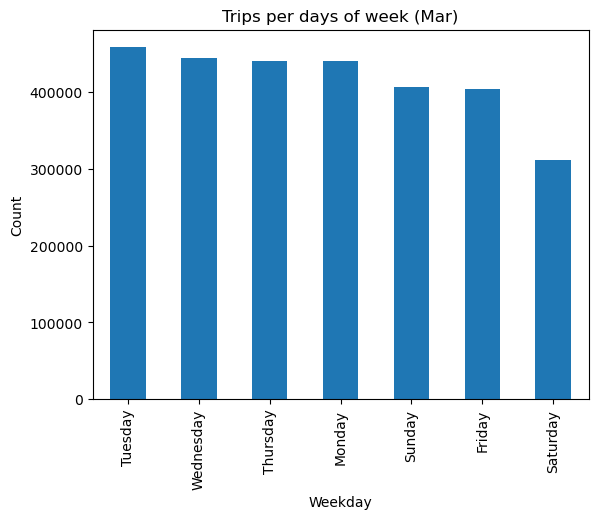

In [17]:
ax = mar_df['weekday_st'].value_counts() \
    .plot(kind='bar', title='Trips per days of week (Mar)')
ax.set_xlabel('Weekday')
ax.set_ylabel('Count')

Likewise, in the month of January, taxi trips exhibit a peak towards the end of the week, particularly on Friday, Thursday, and Wednesday, with trip counts surpassing a million during these days. In contrast, Sunday registers the lowest number of trips for the week. This weekly pattern indicates the influence of weekdays on taxi trip frequency in January as well.

Text(0, 0.5, 'Count')

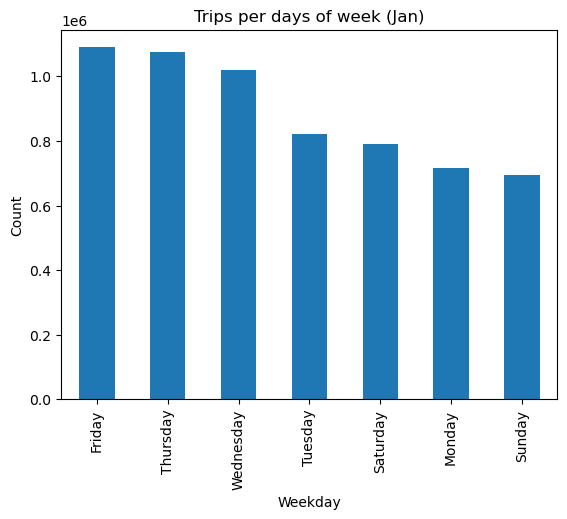

In [18]:
ax = jan_df['weekday_st'].value_counts() \
    .plot(kind='bar', title='Trips per days of week (Jan)')
ax.set_xlabel('Weekday')
ax.set_ylabel('Count')

As part of the assignment, I incorporated the TFDV (TensorFlow Data Validation) module, which offers powerful graphical statistics generated through the Apache Beam library. Although I hadn't previously worked with this module, I found it to be remarkably user-friendly, valuable, and efficient in providing a comprehensive view of the data. It essentially combines the functionality of df.describe() with detailed data visualizations, enabling a deeper exploration and understanding of the dataset.

In [20]:
import tensorflow_data_validation as tfdv
test_stats_mar = tfdv.generate_statistics_from_dataframe(mar_df)
tfdv.visualize_statistics(test_stats_mar)

In [21]:
train_stats_jan = tfdv.generate_statistics_from_dataframe(jan_df)
tfdv.visualize_statistics(train_stats_jan)

Thanks to the user-friendly interface of TFDV, I was able to identify negative values in the "extras" column and, for the "trip_distance" feature, establish a more realistic upper limit of 3,000 miles. This limit reflects the maximum distance between the east and west coasts of the United States and ensures the dataset remains within a plausible range. A clear observation from the analysis is that the "payment_type" is predominantly set to 1, indicating that most people choose to pay using a credit card as their preferred payment method.

In [22]:
mar_df = mar_df.drop('tolls_amount',axis = 1)
mar_df = mar_df[mar_df['extra']>0]
mar_df = mar_df[mar_df['trip_distance']<3000]

jan_df = jan_df.drop('tolls_amount',axis = 1)
jan_df = jan_df[jan_df['extra']>0]
jan_df = jan_df[jan_df['trip_distance']<3000]

Although we didn't observe strong correlations in the data, I opted to create a pairplot to gain a different perspective on the dataset. However, due to system crashes and excessively long computation times, I had to limit the analysis to 500,000 samples. Even after running the code multiple times over several hours, I was unable to generate a plot.

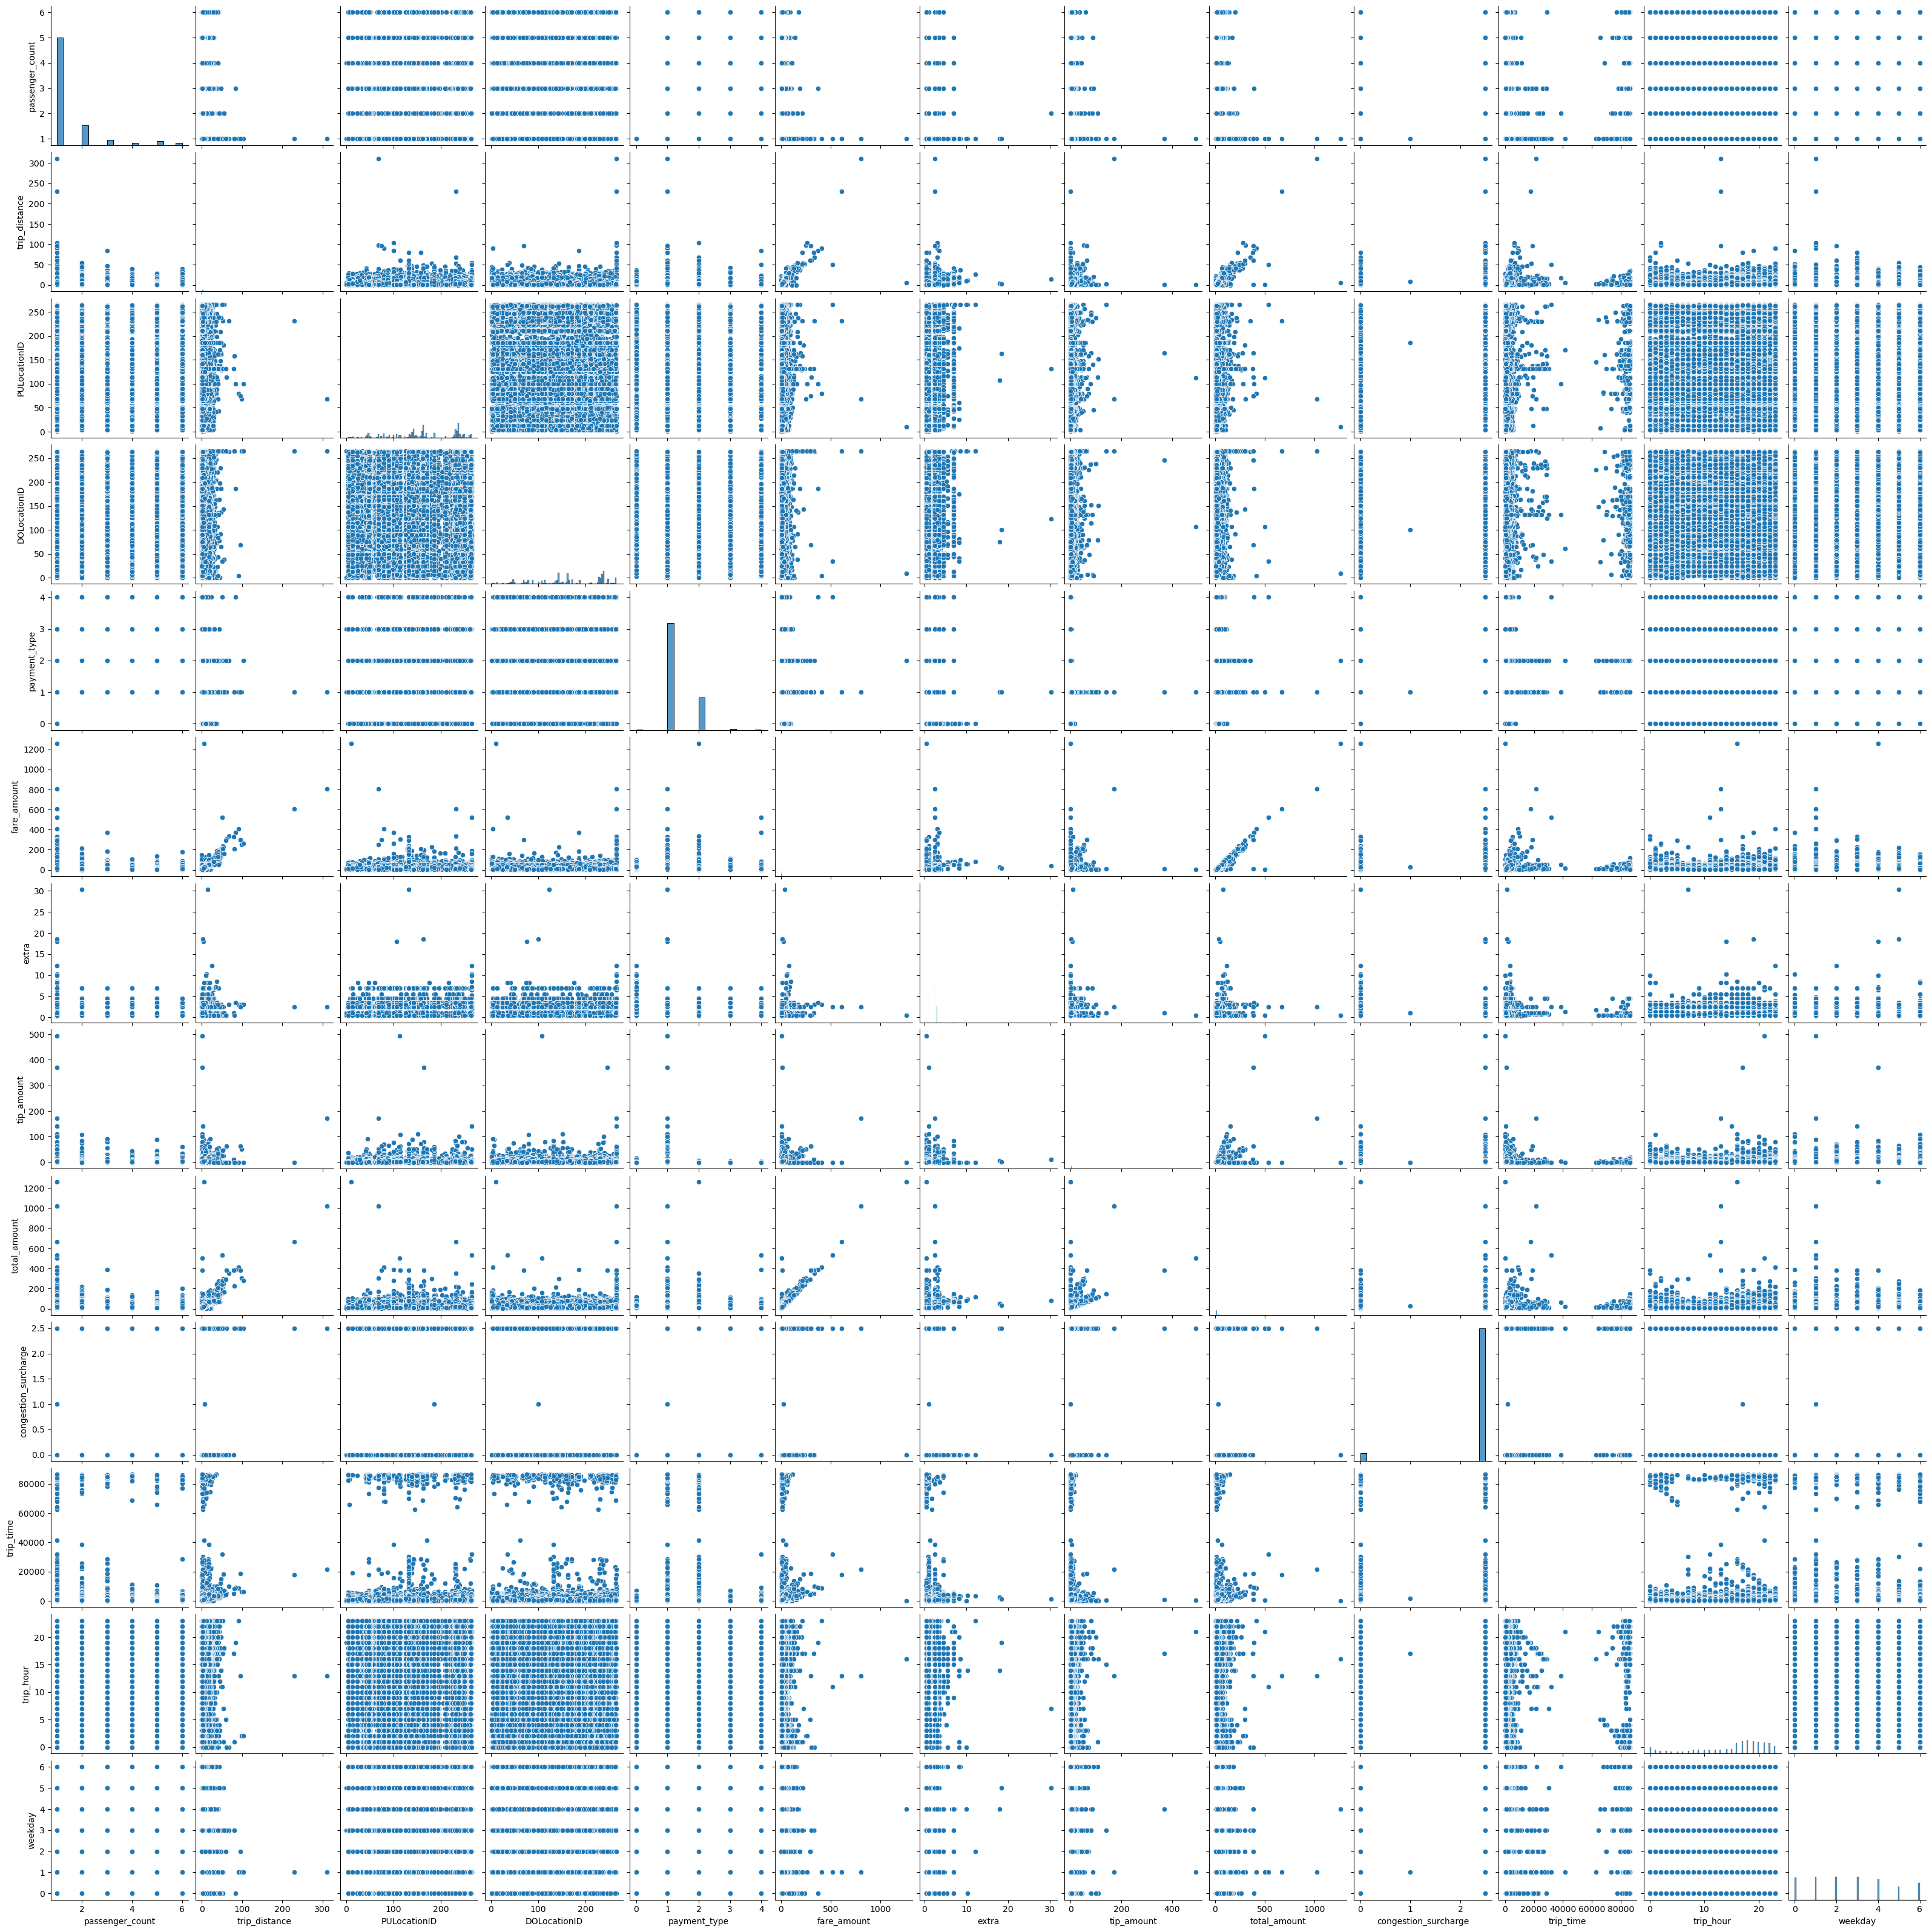

In [23]:
pair_plt_df = mar_df.drop('weekday_st',axis = 1).sample(n = 500000)
sns.pairplot(pair_plt_df) 

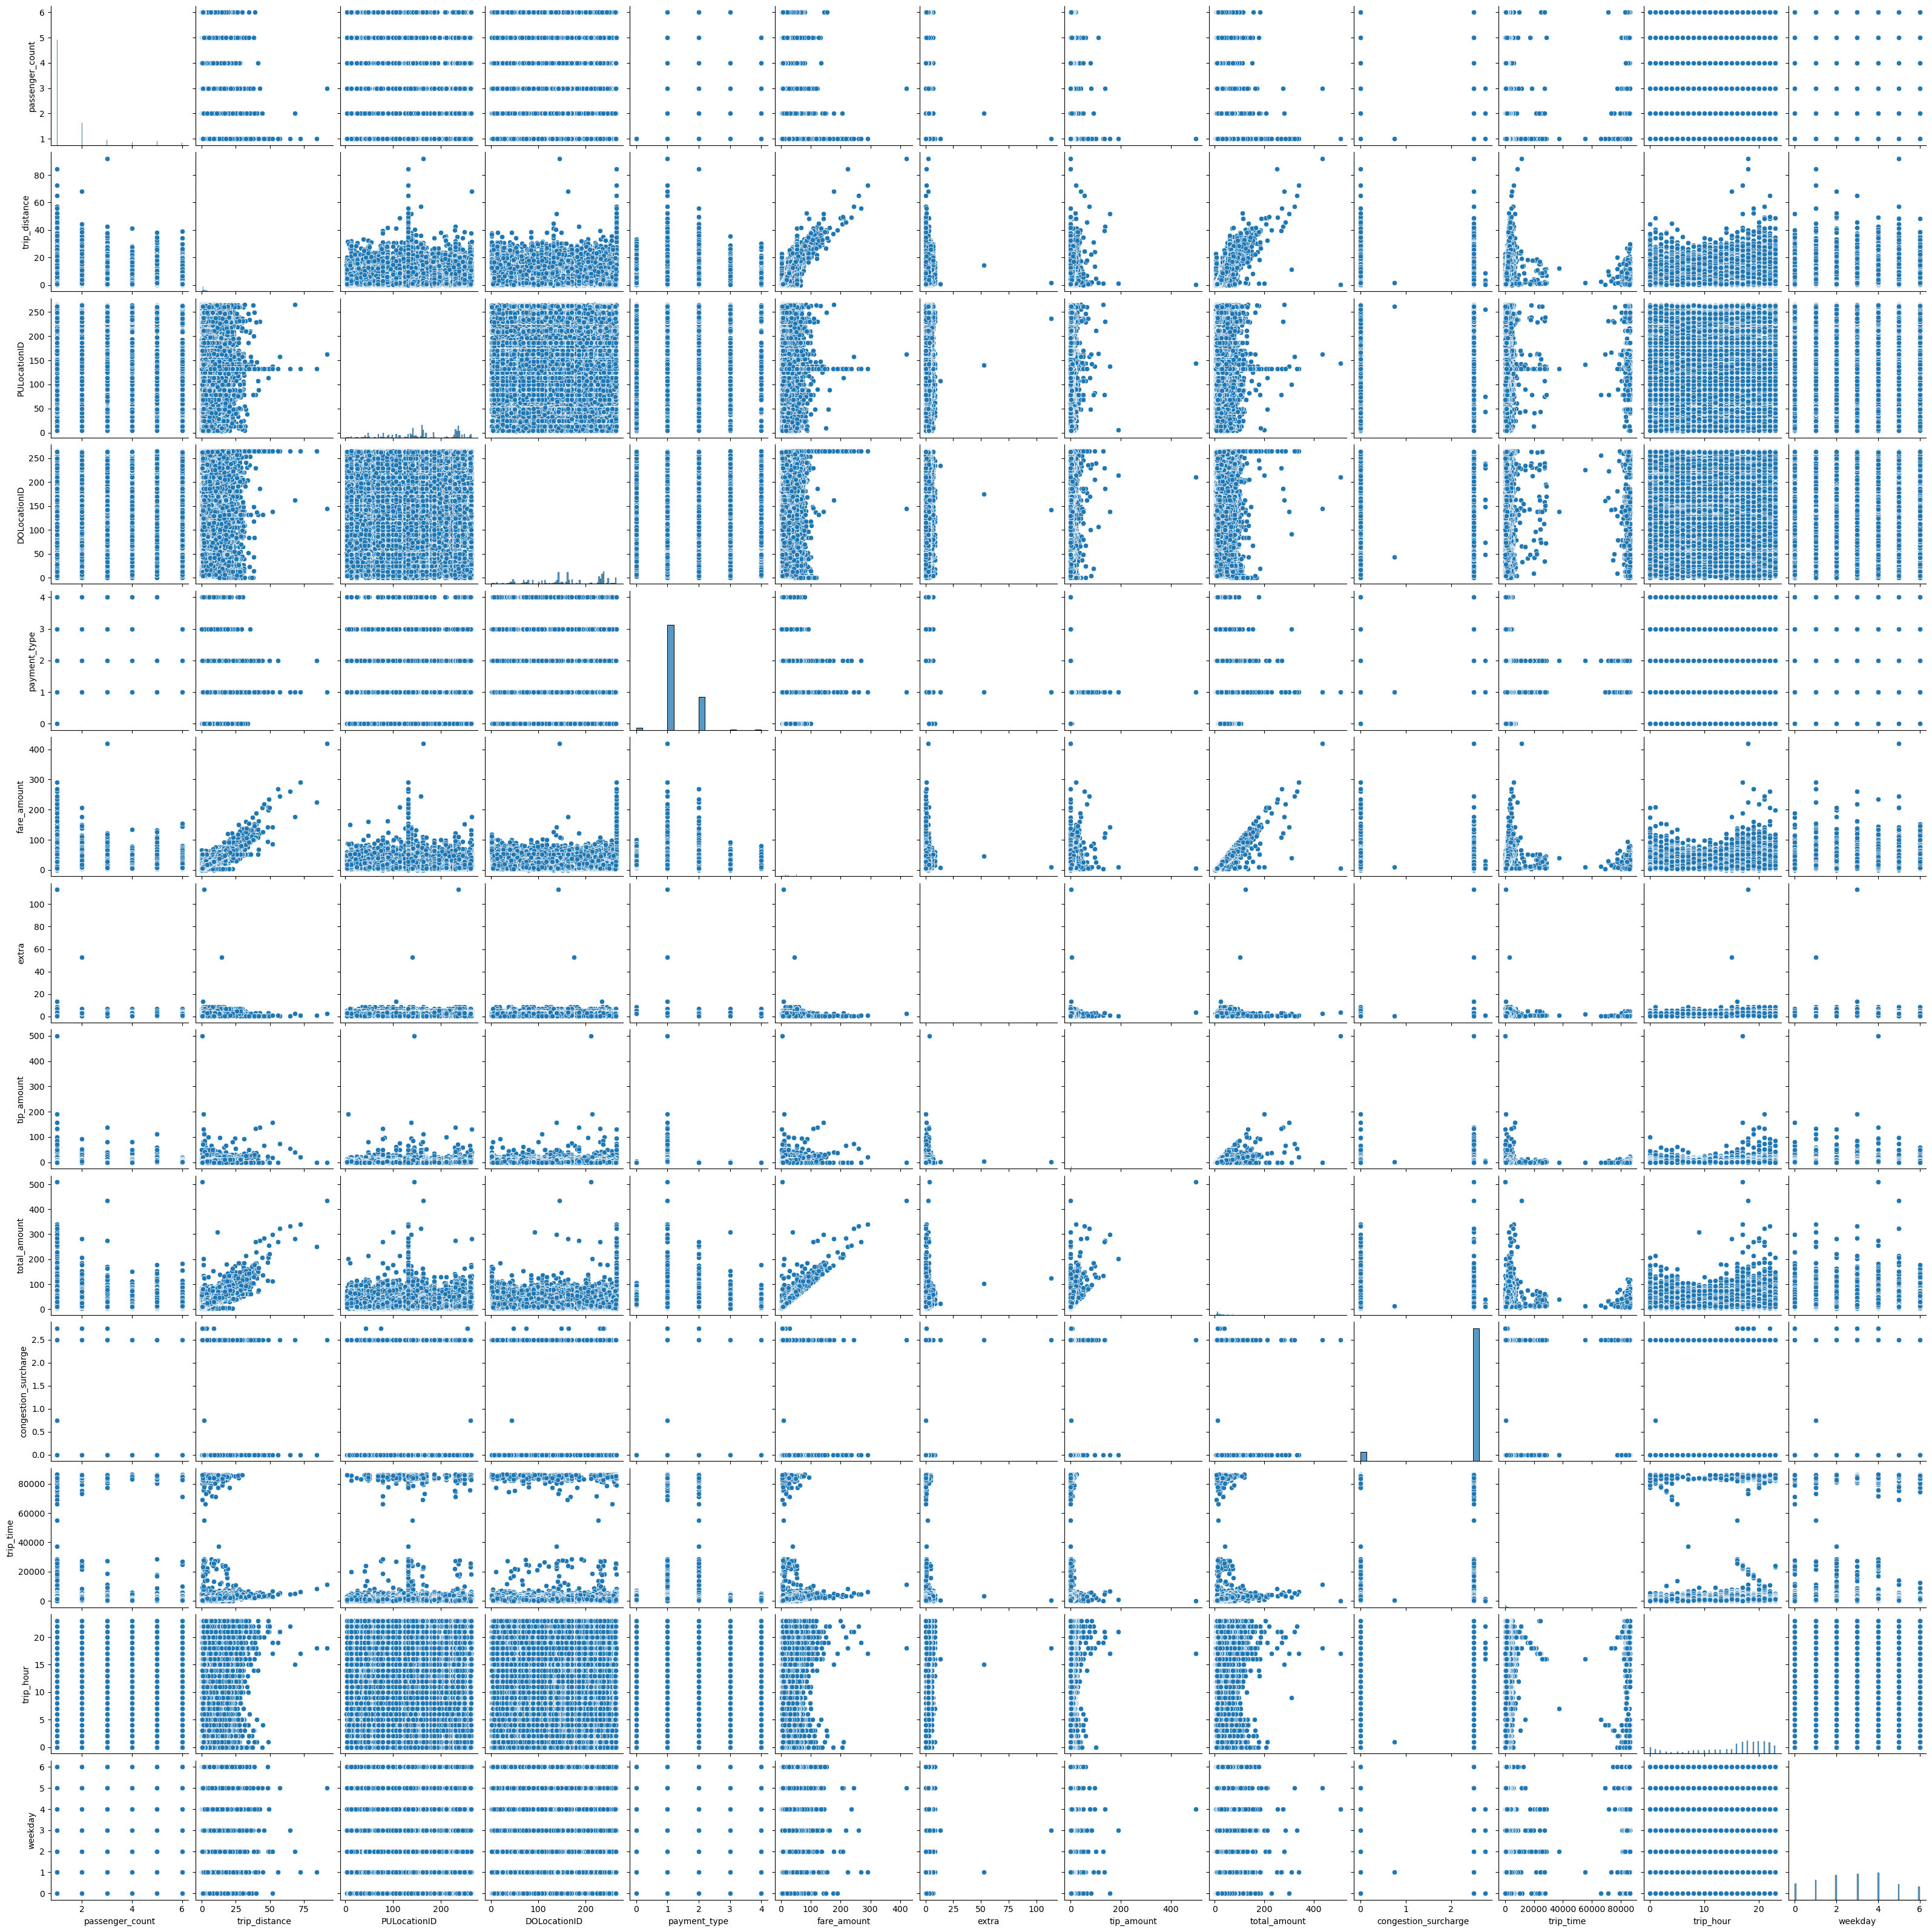

In [24]:
pair_plt_df = jan_df.drop('weekday_st',axis = 1).sample(n = 500000)
sns.pairplot(pair_plt_df) 

As the final stage of the project, I employed the January 2020 dataset as a reference point to understand the typical state of the NYC Taxi business. My analysis involved comparing the data from January 2020 (Jan-2020) to March 2020 (Mar-2020), using the former as a training dataset and the latter as an evaluation dataset. Here are the key insights obtained from this comparison:

Trip Volume:

In January 2020, the taxi business appeared to be more robust, with a higher volume of trips compared to March 2020. This suggests a decline in demand for taxi services in March, which can be attributed to the impact of COVID-19 and associated restrictions.

Temporal Patterns:

In January 2020, taxi trips displayed a relatively consistent and typical temporal pattern, with higher demand during weekdays and a peak towards the end of the week.
In March 2020, the temporal patterns were disrupted, with a notable decrease in late-night and early-morning trips (between 23:00 and 4:00) and a shift towards more daytime trips. This could be a reflection of people's changing routines and restrictions on nightlife.

Payment Methods:

The preference for payment methods remained consistent between the two months. Credit card payments (payment_type = 1) were the most common payment method in both January and March. This suggests that payment preferences were not significantly impacted by the pandemic.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow_data_validation.statistics import stats_options as options
train_stats_jan = tfdv.generate_statistics_from_dataframe(jan_df)
test_stats_mar = tfdv.generate_statistics_from_dataframe(mar_df)

tfdv.visualize_statistics(lhs_statistics=test_stats_mar, rhs_statistics=train_stats_jan,lhs_name='EVAL_DATASET', rhs_name='TRAIN_DATASET')
